**Improving Supply Chain Management by Machine Learning Applications: DataCo Global Case Study**

#### Importing Dataset and Libraries

In [1]:
from google.colab import drive #library to import file directly from google drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd # data analysis and mmanipulation library
import numpy as np # library to work with arrays and matrices

# Multiple outputs for Jupyter Notebook cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Data Visualization Libraries  
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, ShuffleSplit
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, plot_roc_curve, classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Classroom/DAB402 - CAPSTONE PROJECT DAB4A/DataCoSupplyChainDataset.csv", encoding='latin-1')

In [4]:
df.shape #number of observations and attributes  

(180519, 53)

In [5]:
df.head(5).T

,0,1,2,3,4
Type,DEBIT,TRANSFER,CASH,DEBIT,PAYMENT
Days for shipping (real),3,5,4,3,2
Days for shipment (scheduled),4,4,4,4,4
Benefit per order,91.25,-249.089996,-247.779999,22.860001,134.210007
Sales per customer,314.640015,311.359985,309.720001,304.809998,298.25
Delivery Status,Advance shipping,Late delivery,Shipping on time,Advance shipping,Advance shipping
Late_delivery_risk,0,1,0,0,0
Category Id,73,73,73,73,73
Category Name,Sporting Goods,Sporting Goods,Sporting Goods,Sporting Goods,Sporting Goods
Customer City,Caguas,Caguas,San Jose,Los Angeles,Caguas


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [7]:
df.describe().T #5 number summary

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


In [8]:
df['Shipping Mode'].unique()
df['Shipping Mode'].value_counts()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

#### Data Preprocessing

Checking attributes for number of unique values less than 2 as they give no information for our models.  

In [9]:
dfunique= df.nunique().sort_values(ascending= True, na_position='first')
dfunique.head()
#dfunique.to_frame().reset_index().rename(columns={'index': 'Attribute', 0: 'Unique Values'}).head().to_csv('unique1.csv', index=False)

Product Description    0
Product Status         1
Customer Password      1
Customer Email         1
Late_delivery_risk     2
dtype: int64

In [10]:
df.drop(dfunique.index[np.where(dfunique < 2)], axis=1, inplace=True)

Checking low variance for possible no information attributes. 

In [11]:
df.var().sort_values().head()
#df.var().sort_values().head().to_frame().reset_index().rename(columns={'index': 'Attribute', 0: 'Variance'}).to_csv('variance.csv', index=False)

Order Item Discount Rate         0.004958
Order Item Profit Ratio          0.217898
Late_delivery_risk               0.247669
Days for shipment (scheduled)    1.889111
Order Item Quantity              2.112521
dtype: float64

In [12]:
df['Order Item Discount Rate'].value_counts().head()
#df['Order Item Discount Rate'].value_counts().head().to_frame().reset_index().rename(columns={'index': 'Value', 'Order Item Discount Rate': 'Value counts'}).to_csv('Value Count of Low Variable Attribute.csv', index=False)

0.04    10029
0.15    10029
0.25    10029
0.20    10029
0.18    10029
Name: Order Item Discount Rate, dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
dfna= df.isna().sum().sort_values(ascending=False)
dfna.head()

Order Zipcode             155679
Customer Lname                 8
Customer Zipcode               3
Type                           0
Order Item Cardprod Id         0
dtype: int64

Dropped any attribute that have more na values than non-na values.  

In [15]:
df.drop(dfna.index[np.where(dfna > df.shape[0]/2)], axis = 1, inplace= True)

Filled numeric attributes that have na values with corresponding mean value of the attribute.

In [16]:
num= df.select_dtypes('number')
df[num.columns] = num.fillna(num.mean())

Then filled remaining na values in categorical attributes with a string.

In [17]:
df = df.fillna('')

In [18]:
df.isna().sum().sum()

0

In [19]:
df.drop(["Product Image", "Order Item Cardprod Id", "Order Item Id", "Product Card Id", "Category Id", "Customer Country", "Customer State", "Customer Street", "Department Id", "Customer Fname", "Order Item Discount", "Product Category Id"], axis = 1, inplace= True)

Checking correlation between attributes to see whether different attributes give the same or similar information in the dataset.

Text(0.5, 1.0, 'Correlation Heatmap')

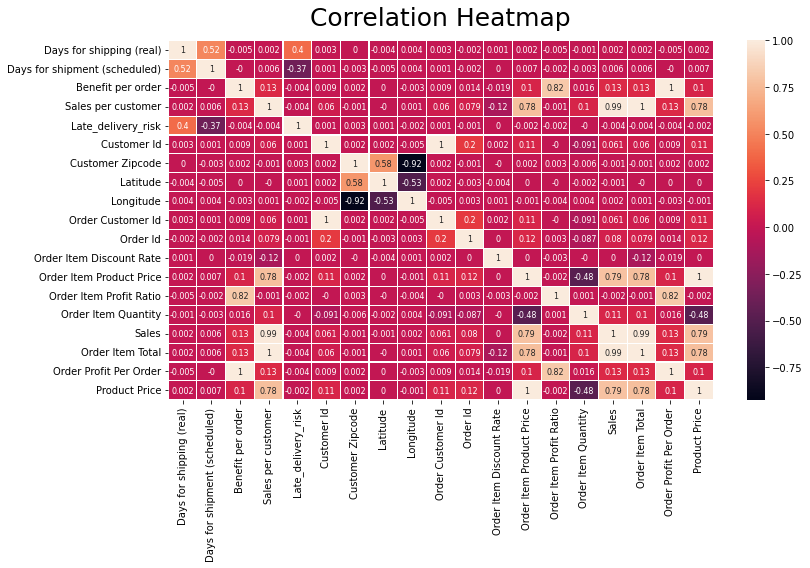

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(df.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8})
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()
#plt.savefig('Correlation Heatmap.png', dpi=200)

In [21]:
# Retain upper triangular values of correlation matrix and make Lower triangular values Null
upper_corr_mat = df.corr().where(np.triu(np.ones(df.corr().shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()

# Sort correlation pairs
unique_corr_pairs.sort_values(ascending= False).head(10)

Product Price            Order Item Product Price    1.000000
Order Profit Per Order   Benefit per order           1.000000
Order Customer Id        Customer Id                 1.000000
Order Item Total         Sales per customer          1.000000
                         Sales                       0.989744
Sales                    Sales per customer          0.989744
Order Profit Per Order   Order Item Profit Ratio     0.823689
Order Item Profit Ratio  Benefit per order           0.823689
Product Price            Sales                       0.789948
Sales                    Order Item Product Price    0.789948
dtype: float64

In [22]:
#unique_corr_pairs.sort_values(ascending= False).head(10).to_frame().reset_index().rename(columns={'level_0': 'Attribute1', 'level_1': 'Attribute2' , 0: 'Correlation'}).to_csv('High Correlation.csv', index=False)

In [23]:
cortable= unique_corr_pairs.sort_values(ascending= False).reset_index()
drop_corr= cortable[cortable.iloc[:,2] > 0.85]["level_1"].values.tolist()
drop_corr

['Order Item Product Price',
 'Benefit per order',
 'Customer Id',
 'Sales per customer',
 'Sales',
 'Sales per customer']

In [24]:
df.drop(drop_corr, axis=1, inplace=True)

In [25]:
df.shape

(180519, 31)

In [26]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Delivery Status                   object
Late_delivery_risk                 int64
Category Name                     object
Customer City                     object
Customer Lname                    object
Customer Segment                  object
Customer Zipcode                 float64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
order date (DateOrders)           object
Order Id                           int64
Order Item Discount Rate         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Order Item Total                 float64
Order Profit Per Order           float64
Order Region    

Changing the data type of  object attributes to categorical and date attributes to datetime.

In [27]:
col_types = {'Customer Lname':'category', 'Customer City':'category', 'Order State':'category' ,'Type':'category', 'Delivery Status':'category', 'Category Name':'category', 'Customer Segment':'category', 'Department Name':'category', 'Market':'category', 'Order Region':'category', 'Order Status':'category', 'Product Name':'category', 'Shipping Mode':'category', 'Order City':'category', 'Order Country':'category'}
df = df.astype(col_types)

In [28]:
df["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"], infer_datetime_format=True)
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"], infer_datetime_format=True)

In [29]:
df.dtypes

Type                                   category
Days for shipping (real)                  int64
Days for shipment (scheduled)             int64
Delivery Status                        category
Late_delivery_risk                        int64
Category Name                          category
Customer City                          category
Customer Lname                         category
Customer Segment                       category
Customer Zipcode                        float64
Department Name                        category
Latitude                                float64
Longitude                               float64
Market                                 category
Order City                             category
Order Country                          category
Order Customer Id                         int64
order date (DateOrders)          datetime64[ns]
Order Id                                  int64
Order Item Discount Rate                float64
Order Item Profit Ratio                 

#### Exploratory Data Analysis

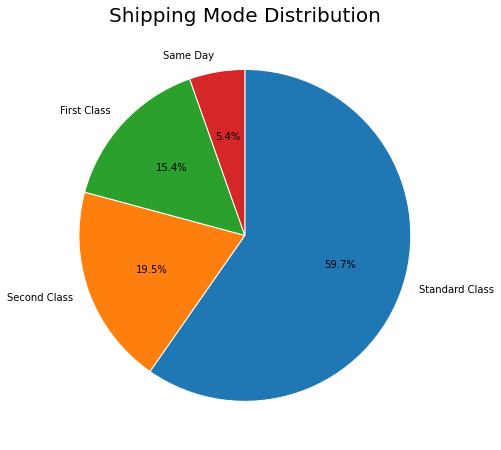

In [30]:
plt.subplots(figsize=(7,7))
plt.pie(df['Shipping Mode'].value_counts(),
    labels= dict(df['Shipping Mode'].value_counts()).keys(),
    autopct= '%1.1f%%',
    startangle= 90,
    counterclock=False,
    wedgeprops = {'edgecolor' : 'white'})
plt.title('Shipping Mode Distribution', size= 20)
plt.tight_layout()
#plt.savefig('shipping mode.png',dpi=200)
plt.show();


Standard class shipping is the highest share among all shipping modes as expected covering more than half of the shipping. It is followed by second class, first class and same day shipping respectively.

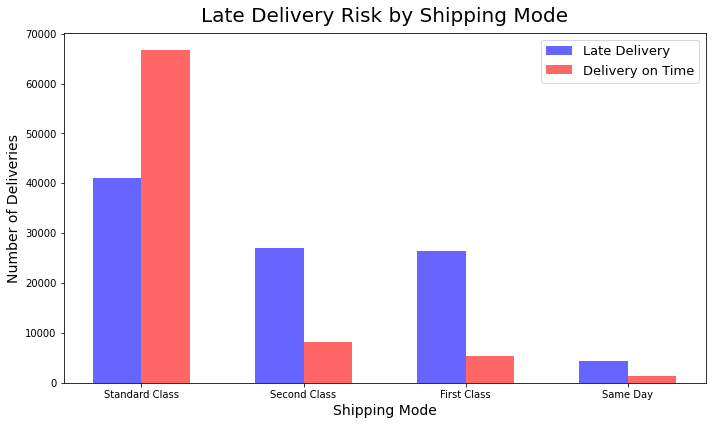

In [31]:
late = df[(df['Late_delivery_risk'] == 1)]
ontime = df[(df['Late_delivery_risk'] == 0)]
count1=late['Shipping Mode'].value_counts()
count2=ontime['Shipping Mode'].value_counts()
names=df['Shipping Mode'].value_counts().keys()
fig,ax = plt.subplots(figsize=(10,6))
index=np.arange(4)
bar_width=0.3
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Late Delivery')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Delivery on Time')
plt.xlabel('Shipping Mode', fontsize= 14)
plt.ylabel('Number of Deliveries', fontsize= 14)
plt.title('Late Delivery Risk by Shipping Mode', fontsize= 20, y=1.015)
plt.legend(fontsize= 13)
plt.xticks(index+bar_width/2,names)
plt.tight_layout()
#plt.savefig('late delivery risk - shipping mode.png',dpi=200)
plt.show();

First class and same day shipping modes are offering more luxury delivery options. However, proportion of late delivery among those categories are higher than standard class delivery.

In [32]:
profits= df.groupby('Product Name')['Order Profit Per Order'].mean().sort_values(ascending=False).head(10).sort_values()


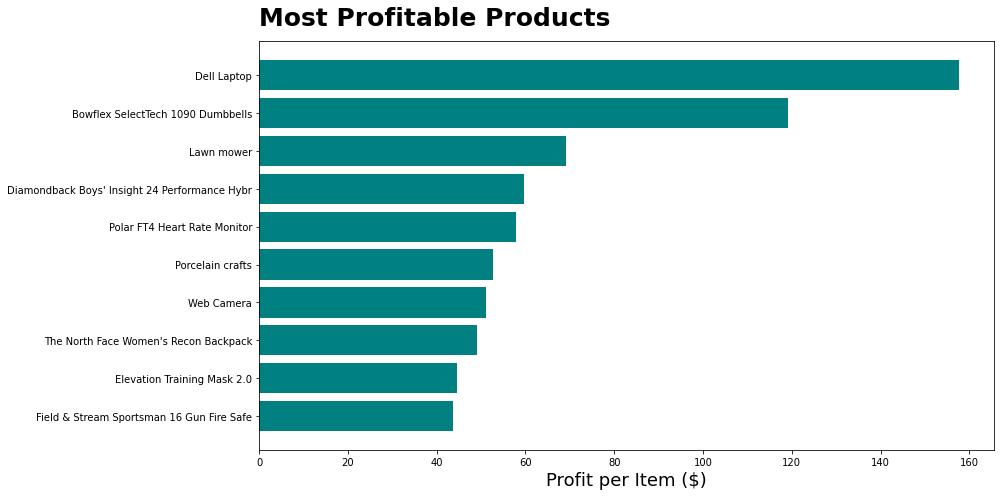

In [33]:
plt.subplots(figsize=(14,7))
plt.barh(list(dict(profits).keys()), profits, color= 'teal')
plt.title('Most Profitable Products', fontweight ='bold', size= 25, loc='left', pad=16)
plt.xlabel('Profit per Item ($)', fontsize = 18)
plt.rc('axes', labelsize=10)    
plt.tight_layout()

#plt.savefig('most profitable products.png',dpi=200)
plt.show();

In [34]:
salesdate= df.groupby(pd.Grouper(key= 'order date (DateOrders)', freq= 'M')).agg({'Order Item Total': 'sum'})
profitdate= df.groupby(pd.Grouper(key= 'order date (DateOrders)', freq= 'M')).agg({'Order Profit Per Order': 'sum'})

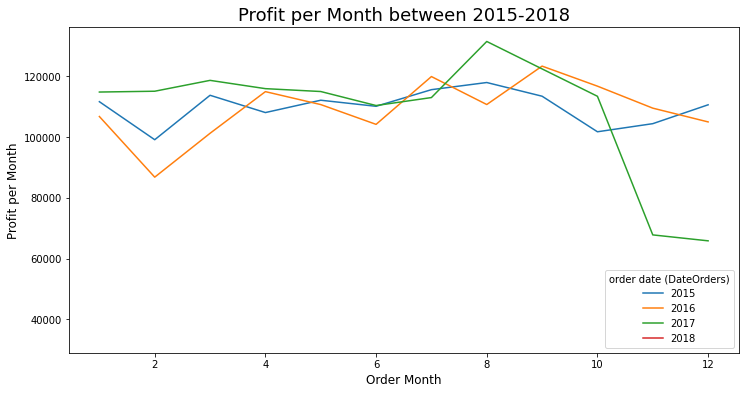

In [35]:
plt.subplots(figsize=(12,6))
plt.ticklabel_format(style='plain')
sns.lineplot(x=profitdate.index.month, y='Order Profit Per Order', data=profitdate, hue= profitdate.index.year, palette= 'tab10')
plt.title('Profit per Month between 2015-2018', fontsize = 18)
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Profit per Month', fontsize = 12)
#plt.savefig('profit per month.png',dpi=200)
plt.show();

Monthly profit from the sales is relatively consistent through the years. However, the profit starts to drop at the end of 2017.

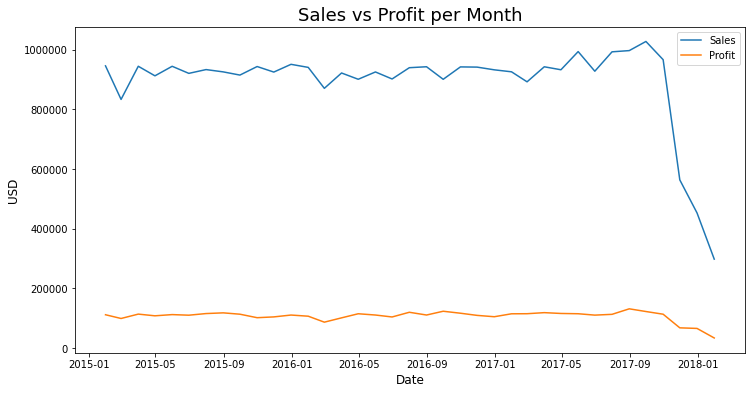

In [36]:
plt.subplots(figsize=(12,6))
plt.ticklabel_format(style='plain')
plt.plot(salesdate.index, salesdate["Order Item Total"], label= 'Sales')
plt.plot(profitdate.index, profitdate["Order Profit Per Order"], label= 'Profit')
plt.title('Sales vs Profit per Month', fontsize = 18)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('USD', fontsize = 12)
plt.legend()
#plt.savefig('sales vs profit.png',dpi=200)
plt.show();

Looking at profit data together with sales data clarifies the sudden drop in profits on the late 2017. Declining sales clearly affected the monthly profit amount.

#### Encoding Date Variables & Feature Selection

In [37]:
df["ship_year"]= df["shipping date (DateOrders)"].dt.year
df["ship_month"]= df["shipping date (DateOrders)"].dt.month
df["ship_day"]= df["shipping date (DateOrders)"].dt.day
df["ship_hour"]= df["shipping date (DateOrders)"].dt.hour
df.drop(["shipping date (DateOrders)"], axis = 1, inplace= True)

In [38]:
df["order_year"]= df["order date (DateOrders)"].dt.year
df["order_month"]= df["order date (DateOrders)"].dt.month
df["order_day"]= df["order date (DateOrders)"].dt.day
df["order_hour"]= df["order date (DateOrders)"].dt.hour
df.drop(["order date (DateOrders)"], axis = 1, inplace= True)

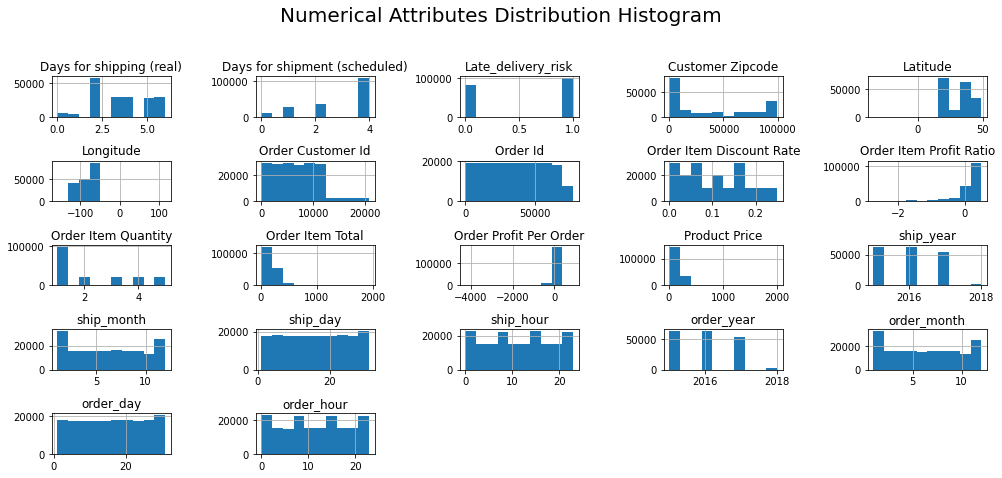

In [41]:
df.hist(figsize=(14,6))
plt.tight_layout()
plt.suptitle('Numerical Attributes Distribution Histogram', size= 20, y= 1.1)
#plt.savefig('Numerical Attributes Distribution Histogram.png',dpi=200)
plt.show();

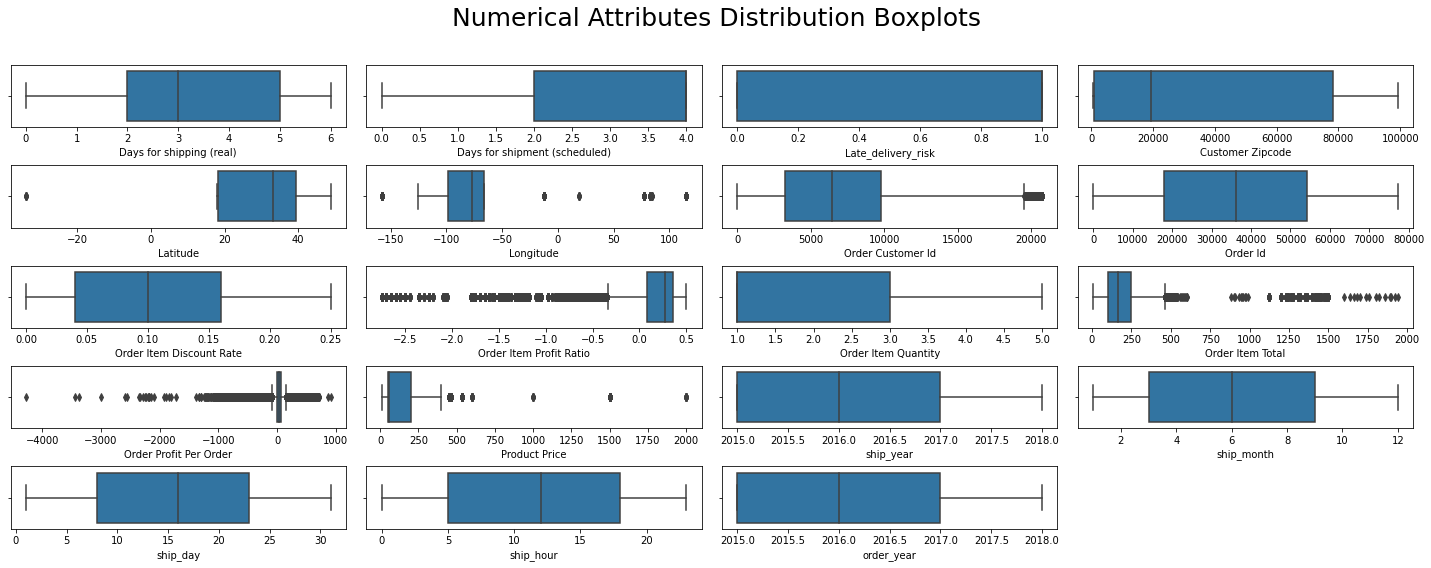

In [45]:
fig, axes = plt.subplots(5,4,figsize=(20,8))
fig.delaxes(axes[4][3])
numdf= df.select_dtypes(exclude="category")
for attr, ax in zip(numdf.columns, axes.flatten()):
    sns.boxplot(x=attr, data=numdf, ax=ax)
    
plt.tight_layout()
fig.suptitle('Numerical Attributes Distribution Boxplots', size= 25) 
fig.subplots_adjust(top=0.88)
#plt.savefig('Numerical Attributes Distribution Boxplots.png',dpi=200)

plt.show();

In [ ]:
# Categorical Attributes
df.select_dtypes(include="category").columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Lname', 'Customer Segment', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Order Status', 'Product Name', 'Shipping Mode'],
      dtype='object')

In [ ]:
# Numerical Attributes
df.select_dtypes(exclude="category").dtypes

Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Late_delivery_risk                 int64
Customer Zipcode                 float64
Latitude                         float64
Longitude                        float64
Order Customer Id                  int64
Order Id                           int64
Order Item Discount Rate         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Order Item Total                 float64
Order Profit Per Order           float64
Product Price                    float64
ship_year                          int64
ship_month                         int64
ship_day                           int64
ship_hour                          int64
order_year                         int64
order_month                        int64
order_day                          int64
order_hour                         int64
dtype: object

####Machine Learning Models with Numerical Features

##### Regression Models for Profit Estimation

In [47]:
# Only Numerical Data
numdf= df.select_dtypes(exclude="category")

In [48]:
#creating explanatory and response variable
X= numdf.drop(["Order Profit Per Order"], axis= 1)
y= numdf["Order Profit Per Order"]

In [49]:
#splitting train and test datasets
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state= 5)

In [50]:
lr= LinearRegression().fit(X_train, y_train)

In [51]:
# Coefficient of determination
print("Linear Regression r2 score:", round(r2_score(y_test, lr.predict(X_test)),3))

Linear Regression r2 score: 0.689


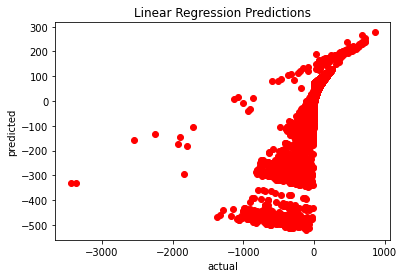

In [52]:
plt.scatter(y_test, lr.predict(X_test), color = 'red')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title("Linear Regression Predictions")
#plt.savefig('Linear Regression Predictions.png',dpi=200)

plt.show();

In [53]:
dtree = DecisionTreeRegressor(max_depth=5, random_state=5)
dtree.fit(X_train, y_train)
print("Decision Tree Regressor r2 score:", round(dtree.score(X_test, y_test),3));

Decision Tree Regressor r2 score: 0.946


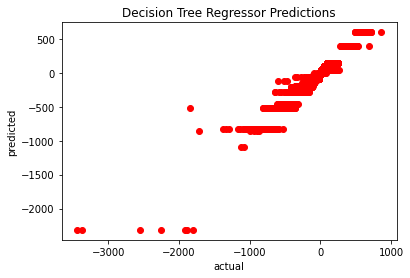

In [54]:
plt.scatter(y_test, dtree.predict(X_test), color = 'red')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title("Decision Tree Regressor Predictions")
#plt.savefig('Decision Tree Regressor Predictions.png',dpi=200)

plt.show();

##### Classification Models for Late Delivery Risk

In [ ]:
df['Late_delivery_risk'].value_counts() #check for unbalanced data
#df['Late_delivery_risk'].value_counts().to_frame().reset_index().rename(columns={'index': 'Level', 'Late_delivery_risk': 'Value Count'}).to_csv('Check Balance Data.csv', index=False)

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

In [ ]:
X= numdf.drop(["Late_delivery_risk"], axis= 1) 
y= numdf["Late_delivery_risk"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifiers= []
classifiers.append(KNeighborsClassifier(n_neighbors=1))
classifiers.append(LogisticRegression())
classifiers.append(GaussianNB())
classifiers.append(RandomForestClassifier(max_depth=5))

Train test split (also named hold-out validation) is basicly splitting dataset into train and test sets randomly. Train set is used for fitting the model and test set is used for validation.

In [ ]:
#train-test split or hold-out validation
accuracy_results1= []
for a in classifiers:
  accuracy_results1.append(round(accuracy_score(y_test, a.fit(X_train, y_train).predict(X_test))*100,2))#y_pred))

In [ ]:
eval_frame= pd.DataFrame()
eval_frame['Model']= ["KNN", "Logistic Regression", "Naive Bayes", "Random Forest"]
eval_frame['train_test_split']= accuracy_results1
eval_frame

,Model,train_test_split
0,KNN,87.60
1,Logistic Regression,97.54
2,Naive Bayes,94.36
3,Random Forest,93.63


Kfold divides the dataset into k sample groups (folds) and prediction function is learned by the k-1 folds and remaining fold is used for testing and validation.	

In [ ]:
#kfold validation
accuracy_results2= []
for a in classifiers:
  pipe = make_pipeline(StandardScaler(), a)
  accuracy_results2.append(round(np.mean(cross_val_score(pipe, X, y, scoring= "accuracy", 
                                                         cv= KFold(), n_jobs= -1)*100),2))

In [ ]:
eval_frame['kfold_5']= accuracy_results2
eval_frame

,Model,train_test_split,kfold_5
0,KNN,87.60,85.61
1,Logistic Regression,97.54,97.55
2,Naive Bayes,94.36,93.63
3,Random Forest,93.63,93.60


Stratified kfold using the same method as kfold with only difference of having approximately same percentege of target variable in each fold.	

In [ ]:
#StratifiedKFold validation
accuracy_results3= []
for a in classifiers:
  pipe = make_pipeline(StandardScaler(), a)
  accuracy_results3.append(round(np.mean(cross_val_score(pipe, X, y, scoring= "accuracy", 
                                                         cv= StratifiedKFold(), n_jobs= -1)*100),2))
eval_frame['strafifiedkfold_5']= accuracy_results3
eval_frame

,Model,train_test_split,kfold_5,strafifiedkfold_5
0,KNN,87.60,85.61,85.14
1,Logistic Regression,97.54,97.55,97.55
2,Naive Bayes,94.36,93.63,93.26
3,Random Forest,93.63,93.60,93.60


Shuffle split model generates independent train test splits and uses train for fitting the model and test for validation for each split. 

In [ ]:
#shuffle validation
accuracy_results4= []
for a in classifiers:
  pipe = make_pipeline(StandardScaler(), a)
  accuracy_results4.append(round(np.mean(cross_val_score(pipe, X, y, scoring= "accuracy", 
                                                         cv= ShuffleSplit(n_splits=5, test_size= 0.3), n_jobs= -1)*100),2))
eval_frame['shuffle']= accuracy_results4
eval_frame

,Model,train_test_split,kfold_5,strafifiedkfold_5,shuffle
0,KNN,87.60,85.61,85.14,87.29
1,Logistic Regression,97.54,97.55,97.55,97.54
2,Naive Bayes,94.36,93.63,93.26,94.10
3,Random Forest,93.63,93.60,93.60,93.63


In [ ]:
#eval_frame.to_csv('numeric_classification_evaluate.csv', index=False)

#### Encoding Categorical Attributes

I used two encoding methods for converting categorical attributes to numerical attributes. One hot encoding for attributes that has less than 8 unique values, and label encoding for attributes that has more than 8 unique values.

In [55]:
unique_categorical= df.select_dtypes(include="category").nunique().sort_values()
unique_categorical
#unique_categorical.to_frame().reset_index().rename(columns={'index': 'Categorical Attribute', 0: 'Unique Values'}).to_csv('Unique Value Counts of Categorical Attributes.csv', index=False)

Customer Segment       3
Type                   4
Delivery Status        4
Shipping Mode          4
Market                 5
Order Status           9
Department Name       11
Order Region          23
Category Name         50
Product Name         118
Order Country        164
Customer City        563
Order State         1089
Customer Lname      1110
Order City          3597
dtype: int64

#####One Hot Encoding

This method encodes categorical features as one-hot numeric array. Basicly, it creates a binary column for each category of the feature. 

In [56]:
dummydf= pd.get_dummies(df[list(unique_categorical.to_dict().keys())[:5]])
dummydf.head(3)

,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA
0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [57]:
dummydf.shape

(180519, 20)

In [58]:
df1= pd.concat([numdf, dummydf], axis =1)

##### Label Encoding

Label encoder encodes the target feature between 0 and number-of-classes minus 1. 

In [59]:
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x.astype(str))
    return x

In [60]:
label= list(unique_categorical.to_dict().keys())[5:]
labeldf=df[label].apply(Labelencoder_feature)

In [61]:
labeldf.head(3)

,Order Status,Department Name,Order Region,Category Name,Product Name,Order Country,Customer City,Order State,Customer Lname,Order City
0,2,4,15,40,78,70,66,475,483,331
1,5,4,13,40,78,69,66,841,616,391
2,1,4,13,40,78,69,452,841,627,391


In [62]:
df2= pd.concat([df1, labeldf], axis =1)

In [63]:
#removing highly correlated features in the final dataset 
upper_corr_mat1 = df2.corr().where(np.triu(np.ones(df2.corr().shape), k=1).astype(bool))
unique_corr_pairs1 = upper_corr_mat1.unstack().dropna()
unique_corr_pairs1.sort_values(ascending= False).head(10)

Delivery Status_Late delivery  Late_delivery_risk               1.000000
order_year                     ship_year                        0.994073
order_month                    ship_month                       0.952179
Shipping Mode_Standard Class   Days for shipment (scheduled)    0.945696
ship_year                      Order Id                         0.942353
order_year                     Order Id                         0.941952
order_hour                     ship_hour                        0.918932
Order Profit Per Order         Order Item Profit Ratio          0.823689
Product Price                  Order Item Total                 0.781781
Latitude                       Customer Zipcode                 0.584550
dtype: float64

In [64]:
#unique_corr_pairs1.sort_values(ascending= False).head(10).to_frame().reset_index().rename(columns={'level_0': 'Attribute1', 'level_1': 'Attribute2' , 0: 'Correlation'}).to_csv('High Correlation Encoded.csv', index=False)

In [ ]:
cortable1= unique_corr_pairs1.sort_values(ascending= False).reset_index()
drop_corr1= cortable1[cortable1.iloc[:,2] > 0.85]["level_0"].values.tolist()
drop_corr1

['Delivery Status_Late delivery',
 'order_year',
 'order_month',
 'Shipping Mode_Standard Class',
 'ship_year',
 'order_year',
 'order_hour']

In [ ]:
df2.drop(drop_corr1, axis=1, inplace=True)

In [ ]:
df2.shape

(180519, 46)

####Machine Learning Models with Encoded Dataset

##### Regression Models with Encoded Dataset

In [ ]:
X= df2.drop(["Order Profit Per Order"], axis= 1)
y= df2["Order Profit Per Order"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
regressors= []
regressors.append(LinearRegression())
regressors.append(DecisionTreeRegressor(max_depth=5, random_state=5))

In [ ]:
r2_results= []
for a in regressors:
  r2_results.append(round(r2_score(y_test, a.fit(X_train, y_train).predict(X_test))*100,2))#y_pred))

In [ ]:
eval_frame1= pd.DataFrame()
eval_frame1['Model']= ["Linear Regression", "Decision Tree Regressor"]
eval_frame1['train_test_split']= r2_results
eval_frame1

,Model,train_test_split
0,Linear Regression,69.21
1,Decision Tree Regressor,94.75


In [ ]:
#eval_frame1.to_csv('encoded_regression_evaluate.csv', index=False)

##### Classification Models with Encoded Dataset

In [ ]:
X= df2.drop(["Late_delivery_risk"], axis= 1)
X = X.loc[:, ~X.columns.str.startswith('Delivery')]
y= df2["Late_delivery_risk"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
accuracy_results_1= []
for a in classifiers:
  accuracy_results_1.append(round(accuracy_score(y_test, a.fit(X_train, y_train).predict(X_test))*100,2))#y_pred))

eval_frame2= pd.DataFrame()
eval_frame2['Model']= ["KNN", "Logistic Regression", "Naive Bayes", "Random Forest"]
eval_frame2['train_test_split']= accuracy_results_1
eval_frame2

,Model,train_test_split
0,KNN,87.21
1,Logistic Regression,97.50
2,Naive Bayes,79.30
3,Random Forest,95.15


In [ ]:
accuracy_results_2= []
for a in classifiers:
  pipe = make_pipeline(StandardScaler(), a)
  accuracy_results_2.append(round(np.mean(cross_val_score(pipe, X, y, scoring= "accuracy", 
                                                          cv= KFold(), n_jobs= -1)*100),2))
eval_frame2['kfold_5']= accuracy_results2

In [ ]:
accuracy_results_3= []
for a in classifiers:
  pipe = make_pipeline(StandardScaler(), a)
  accuracy_results_3.append(round(np.mean(cross_val_score(pipe, X, y, scoring= "accuracy", 
                                                          cv= StratifiedKFold(), n_jobs= -1)*100),2))
eval_frame2['strafifiedkfold_5']= accuracy_results_3

In [ ]:
accuracy_results_4= []
for a in classifiers:
  pipe = make_pipeline(StandardScaler(), a)
  accuracy_results_4.append(round(np.mean(cross_val_score(pipe, X, y, scoring= "accuracy", 
                                                          cv= ShuffleSplit(n_splits=5, test_size= 0.3), n_jobs= -1)*100),2))
eval_frame2['shuffle']= accuracy_results_4
eval_frame2

,Model,train_test_split,kfold_5,strafifiedkfold_5,shuffle
0,KNN,87.21,85.61,82.84,86.83
1,Logistic Regression,97.50,97.55,97.37,97.54
2,Naive Bayes,79.30,93.63,79.52,79.47
3,Random Forest,95.15,93.60,95.38,95.44


In [ ]:
#eval_frame2.to_csv('encoded_classification_evaluate.csv', index=False)

In [ ]:
best_classifier= classifiers[accuracy_results_1.index(max(accuracy_results_1))]
best_classifier

LogisticRegression()

In [ ]:
print(classification_report(y_test, best_classifier.fit(X_train, y_train).predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     20396
           1       0.97      0.99      0.98     24734

    accuracy                           0.98     45130
   macro avg       0.98      0.97      0.97     45130
weighted avg       0.98      0.98      0.98     45130



In [ ]:
#report= classification_report(y_test, best_classifier.fit(X_train, y_train).predict(X_test),output_dict=True)
#pd.DataFrame(report).T.to_csv('classification_report.csv')

Precision shows how much of our positive guesses were actually positive.

Recall gives how much positive we guessed correctly out of all positive results.

The f1-score gives the harmonic mean of precision and recall.
<div>
<img src="https://inside-machinelearning.com/wp-content/uploads/2021/09/F1-Score.png" width="400"/>
</div>

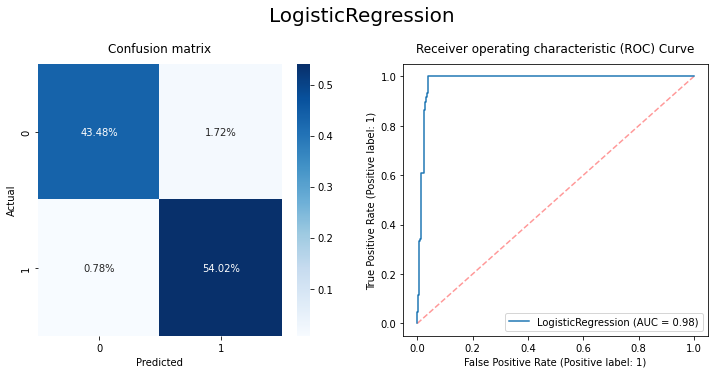

In [ ]:
best_classifier.fit(X_train, y_train)
cf_matrix = confusion_matrix(y_test, best_classifier.predict(X_test))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))
fig.suptitle(str(best_classifier).split('(')[0].lstrip(), fontsize=20, y=1.04)
ax1.set_title('Confusion matrix', y=1.02)
ax2.set_title('Receiver operating characteristic (ROC) Curve', y=1.02)
ax2.plot([0,1], [0,1], 'r--', alpha=.4)
    
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax1)
ax1.set_ylabel('Actual')
ax1.set_xlabel('Predicted')

plot_roc_curve(best_classifier, X_test, y_test, ax=ax2)
#plt.savefig('ROC_curve-confusion_matrix.png', bbox_inches = 'tight', dpi=200)
plt.show();

ROC Curve shows the performance of a classification model at two classification thresholds; true positive rate and false positive rate. <br>
Area under the ROC Curve (AUC) gives the aggregate performance of the classification model. Our AUC for the logistic regression model covers 98% of the all performance evaluation area.